<a href="https://colab.research.google.com/github/ks-yahagi/EU_M_Math-Repository/blob/main/Chapter4_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
[統計web]が確立と統計を学ぶのによいサイト
[https://bellcurve.jp/statistics/]
確率統計は何かものを開発したときに以前の物と比較するときに使用し, よくなったのかを確認する
'''
#以下のライブラリを使うので, あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

#可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#小数点第3位まで表示
%precision 3

#ランダムシードの固定
np.random.seed(0)

In [ ]:
#4-2-1数学的確率
#サイコロが取りうる値を配列に格納
dice_data = np.array([1,2,3,4,5,6])

In [ ]:
#4-2-1-1事象
#引数は, 対象データdice_dataから1つランダムに抽出するという意味
print('1つだけランダムに抽出:',np.random.choice(dice_data,1))

1つだけランダムに抽出: [5]


In [ ]:
#4-2-2統計的確率
#サイコロを1000回振ってみる
calc_steps = 1000

#1~6のデータの中から, 1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

#それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1,7):
  p = len(dice_rolls[dice_rolls==i])/calc_steps
  print(i,'が出る確率',p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


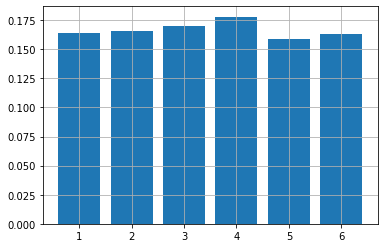

In [ ]:
#4-3-2-1一様分布
#サイコロを1000回振ってみる
calc_steps = 1000

#1?6のデータの中から, 1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

#それぞれの数字がどれくらいの割合で抽出されたか計算
prob_data = np.array([])
for i in range(1,7):
  p = len(dice_rolls[dice_rolls==i])/calc_steps
  prob_data = np.append(prob_data,len(dice_rolls[dice_rolls==i])/calc_steps)

plt.bar(dice_data,prob_data)
plt.grid(True)

In [ ]:
#ベルヌーイ分布
#0:head(表), 1:tail(裏)と考える
#サンプル数を8とした
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])

#uniqueで一意な値を抽出(ここの場合は, 0と1)
for i in np.unique(coin_data):
  p = len(coin_data[coin_data==i])/len(coin_data)
  print(i,'が出る確率',p)
  prob_be_data = np.append(prob_be_data,p)

0 が出る確率 0.625
1 が出る確率 0.375


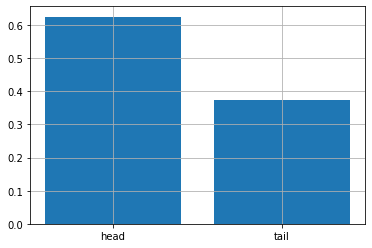

In [ ]:
plt.bar([0,1],prob_be_data,align='center')
plt.xticks([0,1],['head','tail'])
plt.grid(True)

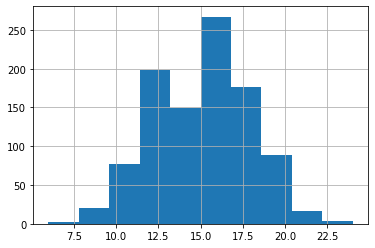

In [ ]:
#二項分布
np.random.seed(0)
x = np.random.binomial(30,0.5,1000)
plt.hist(x)
plt.grid(True)

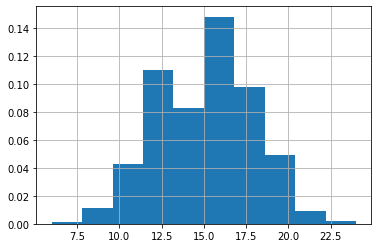

In [ ]:
#二項分布
np.random.seed(0)
x = np.random.binomial(30,0.5,1000)
plt.hist(x,density=True)#←xの横に「density＝True」を入れると確率のグラフになる
plt.grid(True)

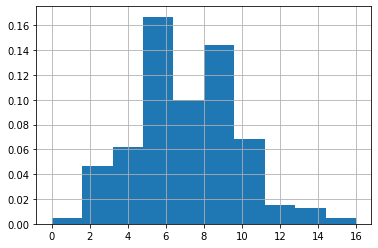

In [ ]:
#ポアソン分布
x = np.random.poisson(7,1000)
#plt.hist(x)
plt.hist(x,density=True)
plt.grid(True)

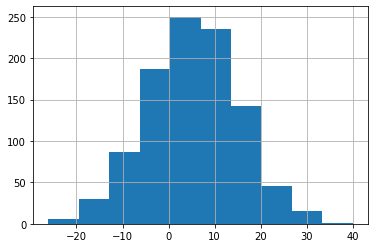

In [ ]:
#正規分布
#np.random.normal(平均, 標準偏差, サンプル数)
x = np.random.normal(5,10,1000)
plt.hist(x)
plt.grid(True)

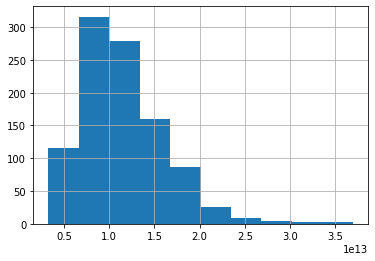

In [ ]:
#対数正規分布
x = np.random.lognormal(30,0.4,1000)
plt.hist(x)
plt.grid(True)

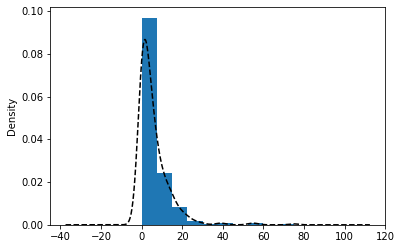

In [10]:
import requests
import zipfile
from io import StringIO
import io

#注:3章でこのデータを取得している方は, 次のコメント文以下から実行してください. 
zip_file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(zip_file_url,stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#データを読み込む
student_data_math = pd.read_csv('student-mat.csv',sep=';')

#カーネル密度関数
student_data_math.absences.plot(kind='kde',style='k--')

#単純なヒスとくらむ, density=Trueにすることで, 確率を表示
student_data_math.absences.hist(density=True)
plt.grid()

In [ ]:
#必要なライブラリの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#データの設定
x,y=np.mgrid[10:100:2,10:100:2]

pos = np.empty(x.shape+(2,))

pos[:,:,0] = x
pos[:,:,1] = y

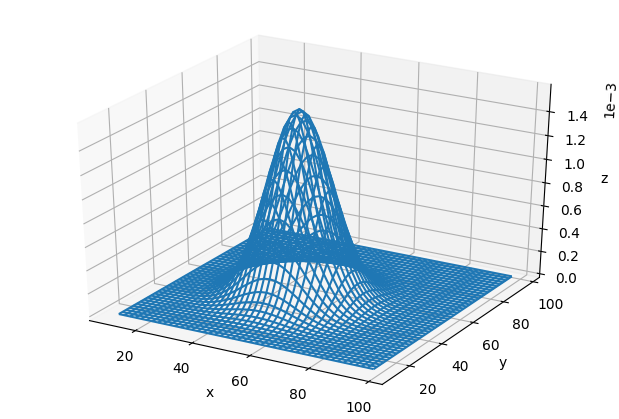

In [ ]:
#多次元正規分布
#それぞれの変数の平均と分散共分散行列を設定
#以下の例では, xとyの平均がそれぞれ50と50, [[100,0],[0,100]]がxとyの共分散行列になります
rv = multivariate_normal([50,50],[[100,0],[0,100]])

#確率密度関数
z = rv.pdf(pos)
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x,y,z)

#x,y,zラベルの設定など
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#z軸の表示目盛単位を変更, sciが指数表示, axisで軸を指定, scilimits=(n,m)はnからmの外にあるものは指数表記
#scilimits=(0,0)はすべて指数表記にするという意味
ax.ticklabel_format(style='sci',axis='z',scilimits=(0,0))

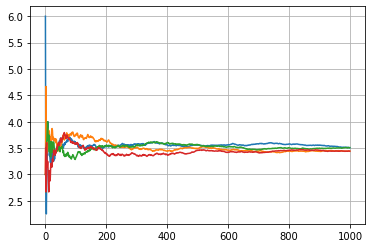

In [6]:
#大数の法則
#計算回数
calc_times = 1000
#サイコロ
sample_array = np.array([1,2,3,4,5,6])
number_cut = np.arange(1,calc_times+1)

#4つのパスを生成
for i in range(4):
  p = np.random.choice(sample_array,calc_times).cumsum()
  plt.plot(p/number_cut)
  plt.grid(True)

In [7]:
#中心極限定理
def function_central_theory(N):

  sample_array=np.array([1,2,3,4,5,6])
  numabar_cut=np.arange(1,N+1)*1.0

  mean_array=np.array([])

  for i in range(1000):
    cum_variables = np.random.choice(sample_array,N).cumsum()*1.0
    mean_array = np.append(mean_array,cum_variables[N-1]/N)
  
  plt.hist(mean_array)
  plt.grid(True)
  

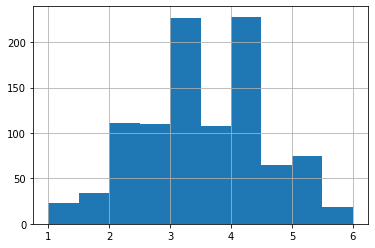

In [8]:
#N=3
function_central_theory(3)

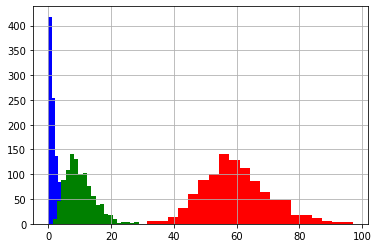

In [12]:
#カイニ乗分布
#自由度2,10,60に従うカイ二乗分布が生成する乱数プログラム
for df,c in zip([2,10,60],'bgr'):
  x = np.random.chisquare(df,1000)
  plt.hist(x,20,color=c)
  plt.grid(True)

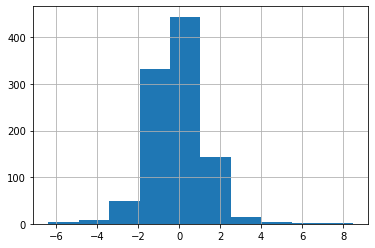

In [13]:
#t分布
x = np.random.standard_t(5,1000)
plt.hist(x)
plt.grid(True)

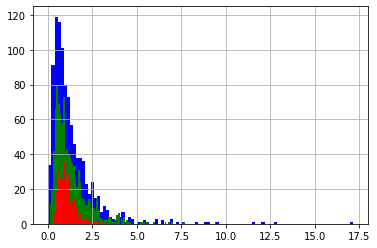

In [15]:
#F分布
for df,c in zip([(6,7),(10,10),(20,25)],'bgr'):
  x = np.random.f(df[0],df[1],1000)
  plt.hist(x,100,color=c)
  plt.grid(True)